In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("bread_basket.csv")
print("DataFrame Shape :", data.shape)
data.head()

DataFrame Shape : (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [10]:
#format data waktu
data['date_time'] = pd.to_datetime(data['date_time'], format= "%d-%m-%Y %H:%M")

In [5]:
data["date_time"].dtype

dtype('O')

In [11]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data["hour"] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


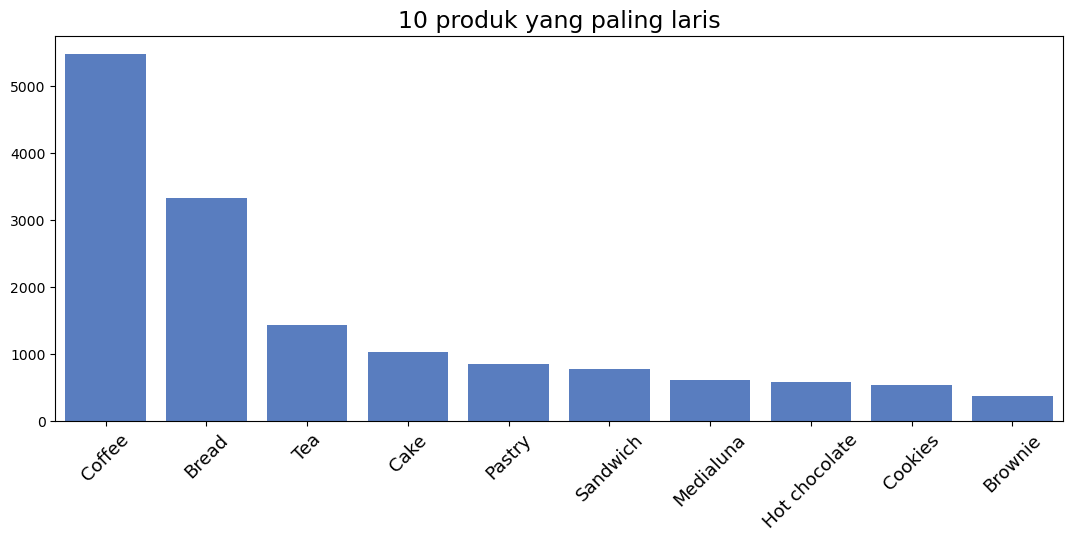

In [16]:
# menampilkan 10 item paling laris
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index,
            y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size =13, rotation = 45)
plt.title('10 produk yang paling laris', size = 17)
plt.show()

Text(0.5, 1.0, 'jumlah transaksi tiap bulan dari october - april')

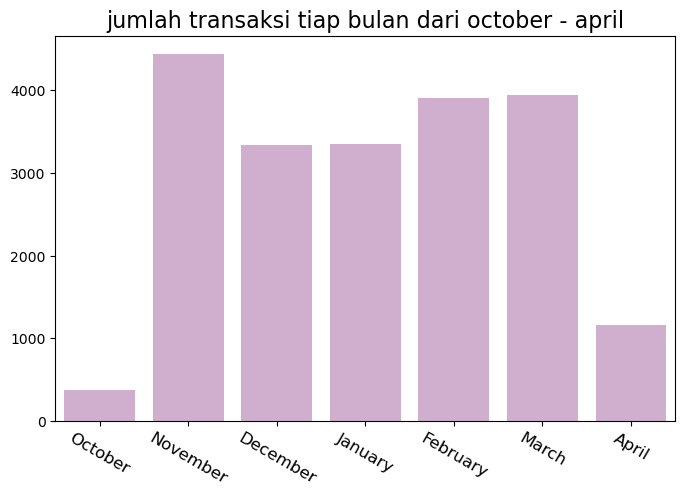

In [20]:
#transaksi tiap bulan
data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color="#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi tiap bulan dari october - april", size = 16)

Text(0.5, 1.0, 'Total Transaki Perhari')

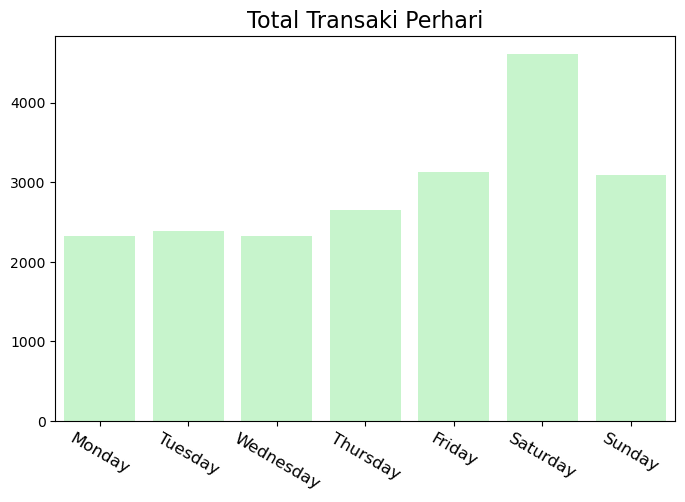

In [22]:
#data perhari
data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_perday.values, color="#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transaki Perhari", size = 16)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '1'),
  Text(1, 0, '7'),
  Text(2, 0, '8'),
  Text(3, 0, '9'),
  Text(4, 0, '10'),
  Text(5, 0, '11'),
  Text(6, 0, '12'),
  Text(7, 0, '13'),
  Text(8, 0, '14'),
  Text(9, 0, '15'),
  Text(10, 0, '16'),
  Text(11, 0, '17'),
  Text(12, 0, '18'),
  Text(13, 0, '19'),
  Text(14, 0, '20'),
  Text(15, 0, '21'),
  Text(16, 0, '22'),
  Text(17, 0, '23')])

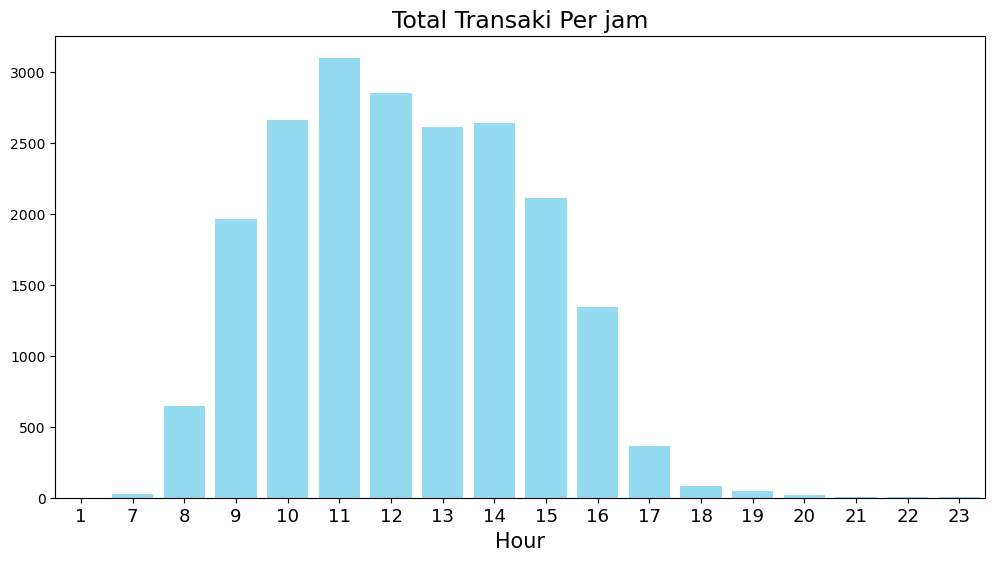

In [23]:
#pembelian perjam
data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize=(12,6))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, color="#85E3FF")
plt.xlabel('Hour', size = 15)
plt.title("Total Transaki Per jam", size = 17)
plt.xticks(size = 13)


In [ ]:
## data Preparation

In [25]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [27]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [28]:
data = data[["Transaction", 'Item']].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [52]:
from mlxtend.frequent_patterns import association_rules, apriori

In [34]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [42]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset :",item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset : (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
def encode(x):
    if x <=0:
        return 0
    elif x >= 1:
        return 1
    
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

C:\Users\fikri azzikri\AppData\Local\Temp\ipykernel_22624\3661972308.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot = item_count_pivot.applymap(encode)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
print("Ukuran Dataset : ", item_count_pivot.shape)
print("Jumlah Transaksi : ", item_count_pivot.shape[0])
print("Jumlah item : ", item_count_pivot.shape[1])

Ukuran Dataset :  (9465, 94)
Jumlah Transaksi :  9465
Jumlah item :  94


In [47]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support= support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

c:\Users\fikri azzikri\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(coffee, bread)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(coffee, cake)"


In [53]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents","consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
31,(toast),(coffee),0.023666,0.704403,1.472431
29,(spanish brunch),(coffee),0.010882,0.598837,1.251766
19,(medialuna),(coffee),0.035182,0.569231,1.189878
23,(pastry),(coffee),0.047544,0.552147,1.154168
0,(alfajores),(coffee),0.019651,0.540698,1.130235
17,(juice),(coffee),0.020602,0.534247,1.116750
25,(sandwich),(coffee),0.038246,0.532353,1.112792
7,(cake),(coffee),0.054728,0.526958,1.101515
27,(scone),(coffee),0.018067,0.522936,1.093107
13,(cookies),(coffee),0.028209,0.518447,1.083723
